In [4]:
import numpy as np
import matplotlib.pyplot as plt

MACHINE_EPS = np.finfo(float).eps

In [10]:
def f(x):
    return np.arctan(x)

def H(x, s):
    return np.arctan(x) - (1 - s) * np.arctan(4)

def dH(x):
    return 1/(x**2)

In [12]:
def newton_method(x, f, df, max_iter=20, min_tol=MACHINE_EPS):
    """
    Perform Newton's method to find a root of a function f(x).

    Parameters:
    - x : array_like
        Initial guess for the root.
    - f : callable
        The function whose root is sought.
    - df : callable
        The derivative of the function `f`.
    - max_iter : int, optional
        Maximum number of iterations (default is 10).
    - min_tol : float, optional
        Minimum tolerance for convergence (default is MACHINE_EPS).

    Returns:
    - x : array_like
        Approximation of the root.
        
    """

    error = []  # Initialize an empty list to store errors at each iteration

    for _ in range(max_iter):
        
        f_val, df_val = f(x), df(x)  # Compute the value of f and its derivative at x
        
        x -= f_val / df_val  # Update x using Newton-Raphson method: x -= f_val / df_val
        
        error.append(np.linalg.norm(f_val))  # Compute and store the error (norm of f_val)
        
        if error[-1] < min_tol:  # Check if the error is below the minimum tolerance
            break  # If converged, exit the loop
    
    return x  # Return the final approximation of the root



In [19]:
def continuation(S, H, dH, x0):
    """
    Performs continuation method to solve a sequence of nonlinear equations.

    Parameters:
    - S : array_like
        Sequence of continuation parameters.
    - H : callable
        Function representing the nonlinear equations system H(x, s).
    - dH : callable
        Derivative of the function H(x, s).
    - x0 : array_like
        Initial guess for the solution.

    Returns:
    - X : list
        List containing the sequence of solutions for each continuation parameter.
    """

    X = [x0]  # Initialize a list with the initial guess x0
    xn = x0  # Set xn as the initial guess
    
    for s in S:
        h = lambda x: H(x, s)  # Define the function h(x) = H(x, s)
        xn = newton_method(xn, h, dH, max_iter=100)  # Use Newton's method to solve H(x, s) = 0
        
        X.append(xn)  # Append the solution for the current continuation parameter to the list X
    
    return X  # Return the list containing the sequence of solutions


In [20]:
X = continuation(np.arange(0, 1.1, 0.1), H, dH, 4)

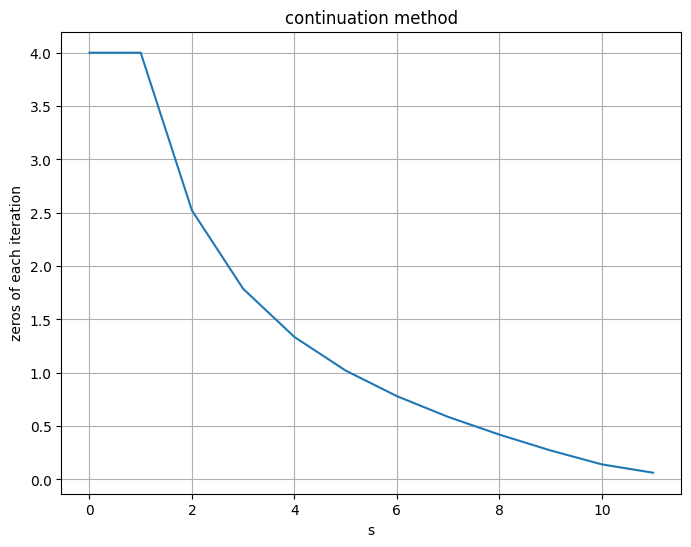

In [21]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(X)
ax.set(xlabel = 's', ylabel = 'zeros of each iteration', title= 'continuation method')
ax.grid()